In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import os
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
matches = pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/Project Data and Stuff/matches.csv')
delivery = pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/Project Data and Stuff/deliveries.csv')

In [3]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [4]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
delivery.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [6]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [7]:
delivery.nunique()

match_id            1095
inning                 6
batting_team          19
bowling_team          19
over                  20
ball                  11
batter               673
bowler               530
non_striker          663
batsman_runs           7
extra_runs             7
total_runs             8
extras_type            5
is_wicket              2
player_dismissed     629
dismissal_kind        10
fielder              607
dtype: int64

In [8]:
delivery.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [9]:
delivery.describe(include='object')

,batting_team,bowling_team,batter,bowler,non_striker,extras_type,player_dismissed,dismissal_kind,fielder
count,260920,260920,260920,260920,260920,14125,12950,12950,9354
unique,19,19,673,530,663,5,629,10,607
top,Mumbai Indians,Mumbai Indians,V Kohli,R Ashwin,V Kohli,wides,RG Sharma,caught,MS Dhoni
freq,31437,31505,6236,4679,6067,8380,223,8063,220


In [10]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [11]:
matches['date'] = pd.to_datetime(matches['date'])

In [12]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1044 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1076 non-null   float64       
 14  target_runs      1092 non-null   float64

In [13]:
matches['seasons'] = matches['date'].dt.year

In [14]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1044 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1076 non-null   float64       
 14  target_runs      1092 non-null   float64

In [15]:
team_names = matches[['team1','team2','toss_winner','winner']]

In [16]:
team_names

,team1,team2,toss_winner,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...
1090,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad
1091,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders
1092,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,Rajasthan Royals
1093,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,Sunrisers Hyderabad


In [17]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'seasons'],
      dtype='object')

In [18]:
url2024_batting ='https://www.espncricinfo.com/records/tournament/batting-most-runs-career/indian-premier-league-2024-15940'
url2023_batting ='https://www.espncricinfo.com/records/tournament/batting-most-runs-career/indian-premier-league-2023-15129'
url2022_batting ='https://www.espncricinfo.com/records/tournament/batting-most-runs-career/indian-premier-league-2022-14452'
url2021_batting ='https://www.espncricinfo.com/records/tournament/batting-most-runs-career/indian-premier-league-2021-13840'
url2020_batting ='https://www.espncricinfo.com/records/tournament/batting-most-runs-career/indian-premier-league-2020-21-13533'
all_batting_url = [url2024_batting,url2023_batting,url2022_batting,url2021_batting]

In [19]:
def get_content(url):
    webpage = requests.get(url)
    web = webpage.content
    soup = BeautifulSoup(web,'html.parser')
    print(soup)

In [20]:
batting = get_content(url2024_batting)

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><link crossorigin="anonymous" href="https://img1.hscicdn.com" rel="preconnect"/><link crossorigin="anonymous" href="https://dcf.espn.com" rel="preconnect"/><link as="font" crossorigin="anonymous" href="https://wassets.hscicdn.com/static/fonts/CiIcons/ci-icons-v3.4/fonts/icomoon.woff?gencn3" rel="preload" type="font/woff2"/><script type="text/javascript">
          /*! js-cookie v3.0.5 | MIT */
          !function(e,t){"object"==typeof exports&&"undefined"!=typeof module?module.exports=t():"function"==typeof define&&define.amd?define(t):(e="undefined"!=typeof globalThis?globalThis:e||self,function(){var n=e.Cookies,o=e.Cookies=t();o.noConflict=function(){return e.Cookies=n,o}}())}(this,(function(){"use strict";function e(e){for(var t=1;t<arguments.length;t++){var n=arguments[t];for(var o in n)e[o]=n[o]}return e}var t=function t(n,o){function r(t,r,i){if("undefined"!=typeof document){"number"==typeof(i=e({},o,i)).expires&&(i.ex

In [21]:
def get_content(url):
    player_names, seasons, matches, innings, not_outs, runs = [], [], [], [], [], []
    highest_scores, averages, balls_faced, strike_rates = [], [], [], []
    hundreds, fifties, ducks, fours, sixes = [], [], [], [], []
    webpage = requests.get(url)
    web = webpage.content
    soup = BeautifulSoup(web, 'html.parser')
    
    rows = soup.find_all('tr', {'class': 'ds-bg-ui-fill-translucent'})

    for row in rows:
        columns = row.find_all('td')
        player_names.append(columns[0].text.strip())   # Player name
        seasons.append(columns[1].text.strip())        # Season
        matches.append(columns[2].text.strip())        # Matches
        innings.append(columns[3].text.strip())        # Innings
        not_outs.append(columns[4].text.strip())       # Not Outs
        runs.append(columns[5].text.strip())           # Runs
        highest_scores.append(columns[6].text.strip()) # Highest Score
        averages.append(columns[7].text.strip())       # Average
        balls_faced.append(columns[8].text.strip())    # Balls Faced
        strike_rates.append(columns[9].text.strip())   # Strike Rate
        hundreds.append(columns[10].text.strip())      # 100s
        fifties.append(columns[11].text.strip())       # 50s
        ducks.append(columns[12].text.strip())         # 0s (Ducks)
        fours.append(columns[13].text.strip())         # 4s
        sixes.append(columns[14].text.strip())         # 6s

    data = {
        "Player": player_names,
        "Season": seasons,
        "Matches": matches,
        "Innings": innings,
        "Not Outs": not_outs,
        "Runs": runs,
        "Highest Score": highest_scores,
        "Average": averages,
        "Balls Faced": balls_faced,
        "Strike Rate": strike_rates,
        "100s": hundreds,
        "50s": fifties,
        "Ducks": ducks,
        "Fours": fours,
        "Sixes": sixes
    }
    
    return pd.DataFrame(data)
df_orangecap = get_content(url2020_batting)

In [22]:
df_orangecap.head()

,Player,Season,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,100s,50s,Ducks,Fours,Sixes
0,S Dhawan (DC),2020-2020,17,17,3,618,106*,44.14,427,144.73,2,4,4,67,12
1,DA Warner (SRH),2020-2020,16,16,2,548,85*,39.14,407,134.64,-,4,-,52,14
2,SS Iyer (DC),2020-2020,17,17,2,519,88*,34.60,421,123.27,-,3,-,40,16
3,Ishan Kishan (MI),2020-2020,14,13,4,516,99,57.33,354,145.76,-,4,1,36,30
4,Q de Kock (MI),2020-2020,16,16,2,503,78*,35.92,358,140.50,-,4,1,46,22


In [23]:
for url in all_batting_url:
    df = get_content(url)
    df_orangecap = pd.concat([df_orangecap, df], axis=0, ignore_index=True)

In [24]:
df_orangecap.head()

,Player,Season,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,100s,50s,Ducks,Fours,Sixes
0,S Dhawan (DC),2020-2020,17,17,3,618,106*,44.14,427,144.73,2,4,4,67,12
1,DA Warner (SRH),2020-2020,16,16,2,548,85*,39.14,407,134.64,-,4,-,52,14
2,SS Iyer (DC),2020-2020,17,17,2,519,88*,34.60,421,123.27,-,3,-,40,16
3,Ishan Kishan (MI),2020-2020,14,13,4,516,99,57.33,354,145.76,-,4,1,36,30
4,Q de Kock (MI),2020-2020,16,16,2,503,78*,35.92,358,140.50,-,4,1,46,22


In [25]:
api_key = '9985cf6f-d79b-40c2-a3d4-91de8a70e21e'

url = f"https://api.cricapi.com/v1/players?apikey=9985cf6f-d79b-40c2-a3d4-91de8a70e21e&offset=0"

response = requests.get(url)
player_stats = response.json()

print(player_stats)

{'apikey': '9985cf6f-d79b-40c2-a3d4-91de8a70e21e', 'data': [{'id': '8bf2ba03-89e8-4e9d-ab2f-35f5827d3db2', 'name': 'Vera Poglitsch', 'country': 'Austria'}, {'id': 'ef32eac1-9ae9-42d6-aaf6-681b3ed1859a', 'name': 'Mounica Chowdary', 'country': 'Luxembourg'}, {'id': '2fc1e090-8980-4edd-b822-3b5926c39640', 'name': 'Maja Jevdjenovic', 'country': 'Serbia'}, {'id': '2218c523-58c1-46a2-98d2-1dbe6a193515', 'name': 'Purvi Kumari', 'country': 'Norway'}, {'id': 'ff6d7c46-b523-4ddd-9ce8-3d7909aabd25', 'name': 'Camilla Madsen', 'country': 'Denmark'}, {'id': 'f2de48ff-c098-4d7c-b765-531947552f9f', 'name': 'Anne Ostergaard', 'country': 'Denmark'}, {'id': '44bdc078-f8e3-4e6a-8fa4-b895a1392677', 'name': 'Rael Kaibunga', 'country': 'Kenya'}, {'id': 'd6f8c896-45a5-4257-a3d1-3e65a21edb52', 'name': 'Zainab Hamisi', 'country': 'Kenya'}, {'id': 'b1a59add-4784-4802-af40-23e7eb721a84', 'name': 'Chanceline Umutonni', 'country': 'Rwanda'}, {'id': '12bfb4de-d9b4-473d-b334-67b5abaa9074', 'name': 'Janet Nthenya', 'c

In [26]:
import requests

url = "https://cricbuzz-cricket.p.rapidapi.com/stats/v1/player/1413/career"

#https://www.cricbuzz.com/profiles/1413/virat-kohli

headers = {
	"x-rapidapi-key": "8059621e14mshc8a87275c23c53ap16688cjsne9cf038116b2",
	"x-rapidapi-host": "cricbuzz-cricket.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
data = response.json()

# Extract data
values = data['values']
app_index = data['appIndex']

# Create a DataFrame from 'values'
df = pd.DataFrame(values)

# Add additional fields from 'appIndex' to the DataFrame
df['seoTitle'] = app_index['seoTitle']
df['webURL'] = app_index['webURL']

In [27]:
df

,name,debut,lastPlayed,seoTitle,webURL
0,t20,"vs Zimbabwe, 2010-06-12, Harare Sports Club","vs South Africa, 2024-06-29, Kensington Oval",Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
1,test,"vs West Indies, 2011-06-20, Sabina Park","vs South Africa, 2024-01-03, Newlands",Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
2,odi,"vs Sri Lanka, 2008-08-18, Rangiri Dambulla In...","vs Sri Lanka, 2024-08-07, R.Premadasa Stadium",Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
3,ipl,"vs Kolkata Knight Riders, 2008-04-18, M.Chinn...","vs Rajasthan Royals, 2024-05-22, Narendra Mod...",Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
4,cl,"vs Cape Cobras, 2009-10-08, M.Chinnaswamy Sta...","vs Mumbai Indians, 2011-10-09, MA Chidambaram...",Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli


In [28]:
url = "https://cricbuzz-cricket.p.rapidapi.com/stats/v1/player/1413/batting"

headers = {
	"x-rapidapi-key": "8059621e14mshc8a87275c23c53ap16688cjsne9cf038116b2",
	"x-rapidapi-host": "cricbuzz-cricket.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

data =response.json()
# Extract headers and values
headers = data['headers']
values = data['values']

# Convert values to a DataFrame
df = pd.DataFrame([v['values'] for v in values], columns=headers)
df['seoTitle'] = data['appIndex']['seoTitle']
df['webURL'] = data['appIndex']['webURL']

{'headers': ['ROWHEADER', 'Test', 'ODI', 'T20', 'IPL'], 'values': [{'values': ['Matches', '113', '295', '125', '252']}, {'values': ['Innings', '191', '283', '117', '244']}, {'values': ['Runs', '8848', '13906', '4188', '8004']}, {'values': ['Balls', '15924', '14866', '3056', '6065']}, {'values': ['Highest', '254', '183', '122', '113']}, {'values': ['Average', '49.16', '58.18', '48.7', '38.67']}, {'values': ['SR', '55.56', '93.54', '137.04', '131.97']}, {'values': ['Not Out', '11', '44', '31', '37']}, {'values': ['Fours', '991', '1302', '369', '705']}, {'values': ['Sixes', '26', '152', '124', '272']}, {'values': ['Ducks', '14', '16', '7', '10']}, {'values': ['50s', '30', '72', '38', '55']}, {'values': ['100s', '29', '50', '1', '8']}, {'values': ['200s', '7', '0', '0', '0']}, {'values': ['300s', '0', '0', '0', '0']}, {'values': ['400s', '0', '0', '0', '0']}], 'appIndex': {'seoTitle': 'Virat Kohli Profile - Cricbuzz | Cricbuzz.com', 'webURL': 'http://www.cricbuzz.com/profiles/1413/virat-ko

In [29]:
df

,ROWHEADER,Test,ODI,T20,IPL,seoTitle,webURL
0,Matches,113,295,125,252,Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
1,Innings,191,283,117,244,Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
2,Runs,8848,13906,4188,8004,Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
3,Balls,15924,14866,3056,6065,Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
4,Highest,254,183,122,113,Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
5,Average,49.16,58.18,48.7,38.67,Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
6,SR,55.56,93.54,137.04,131.97,Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
7,Not Out,11,44,31,37,Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
8,Fours,991,1302,369,705,Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli
9,Sixes,26,152,124,272,Virat Kohli Profile - Cricbuzz | Cricbuzz.com,http://www.cricbuzz.com/profiles/1413/virat-kohli


In [30]:
url = "https://cricbuzz-cricket.p.rapidapi.com/stats/v1/series/7607"
querystring = {"statsType": "mostRuns"}

headers = {
    "x-rapidapi-key": "8059621e14mshc8a87275c23c53ap16688cjsne9cf038116b2",
    "x-rapidapi-host": "cricbuzz-cricket.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
data = response.json()
print(data)
print(data['t20StatsList']['values'])

{'t20StatsList': {'headers': ['Batter', 'M', 'I', 'R', 'Avg'], 'values': [{'values': ['1413', 'Kohli', '15', '15', '741', '61.75']}, {'values': ['11813', 'Ruturaj Gaikwad', '14', '14', '583', '53.00']}, {'values': ['12305', 'Riyan Parag', '15', '14', '573', '52.09']}, {'values': ['8497', 'Head', '15', '15', '567', '40.50']}, {'values': ['8271', 'Samson', '15', '15', '531', '48.27']}, {'values': ['13866', 'Sai Sudharsan', '12', '12', '527', '47.91']}, {'values': ['8733', 'Rahul', '14', '14', '520', '37.14']}, {'values': ['9406', 'Pooran', '14', '14', '499', '62.38']}, {'values': ['2276', 'Narine', '14', '14', '488', '34.86']}, {'values': ['12086', 'Abhishek Sharma', '16', '16', '484', '32.27']}, {'values': ['10209', 'Klaasen', '16', '15', '479', '39.92']}, {'values': ['10744', 'Pant', '13', '13', '446', '40.55']}, {'values': ['7825', 'du Plessis', '15', '15', '438', '29.20']}, {'values': ['10479', 'Salt', '12', '12', '435', '39.55']}, {'values': ['13940', 'Yashasvi Jaiswal', '15', '15',

In [31]:
headers = data['t20StatsList']['headers']
values = data['t20StatsList']['values']
headers = ['ID', 'Player', 'Matches', 'Inns', 'Runs', 'Avg']
df = pd.DataFrame([v['values'] for v in values], columns=headers)
df = df.drop(columns=['ID'])
df.columns = ['Player', 'Matches', 'Inns', 'Runs', 'Avg']
df.head()

,Player,Matches,Inns,Runs,Avg
0,Kohli,15,15,741,61.75
1,Ruturaj Gaikwad,14,14,583,53.00
2,Riyan Parag,15,14,573,52.09
3,Head,15,15,567,40.50
4,Samson,15,15,531,48.27


In [32]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [33]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,seasons
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,2008


Lets Do some EDA to get Key Details of the Data

In [34]:
# All of the Venues with matches Played
matches['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [35]:
venue_mapping = {
    'M Chinnaswamy Stadium': ['M Chinnaswamy Stadium', 'M.Chinnaswamy Stadium','M Chinnaswamy Stadium, Bengaluru'],
    'Punjab Cricket Association Stadium': [
        'Punjab Cricket Association Stadium, Mohali',
        'Punjab Cricket Association IS Bindra Stadium, Mohali',
        'Punjab Cricket Association IS Bindra Stadium',
        'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh'
    ],
    'MA Chidambaram Stadium': ['MA Chidambaram Stadium, Chepauk', 'MA Chidambaram Stadium, Chepauk, Chennai'],
    'Rajiv Gandhi International Cricket Stadium': [
        'Rajiv Gandhi International Stadium, Uppal',
        'Rajiv Gandhi International Stadium, Uppal, Hyderabad'
    ],
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': [
        'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
        'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam'
    ],
    'Arun Jaitley Stadium': ['Arun Jaitley Stadium', 'Arun Jaitley Stadium, Delhi'],
    'Eden Gardens': ['Eden Gardens', 'Eden Gardens, Kolkata'],
    'Brabourne Stadium' :['Brabourne Stadium','Brabourne Stadium, Mumbai'],
    'Maharashtra Cricket Association Stadium' :['Maharashtra Cricket Association Stadium','Maharashtra Cricket Association Stadium, Pune']
}

# Create a reverse mapping
reverse_mapping = {v: k for k, values in venue_mapping.items() for v in values}

# Apply the mapping to standardize venue names
matches['Standardized Venue'] = matches['venue'].map(reverse_mapping).fillna(matches['venue'])

print(matches['Standardized Venue'].unique())

['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Cricket Stadium'
 'MA Chidambaram Stadium' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Saurashtra Cricket Association Stadium' 'Green Park'
 'Rajiv Gandhi International Stadium' 'Arun Ja

In [36]:
# Assuming 'matches' is your DataFrame
matches['Standardized Venue'] = matches['venue'].map(reverse_mapping).fillna(matches['venue'])

# Optionally, drop the old column and rename the new column
matches = matches.drop(columns=['venue'])
matches = matches.rename(columns={'Standardized Venue': 'venue'})

In [37]:
matches['venue'].unique()

array(['M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium',
       'Feroz Shah Kotla', 'Wankhede Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Cricket Stadium',
       'MA Chidambaram Stadium', 'Dr DY Patil Sports Academy', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium

In [39]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1044 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   team1            1095 non-null   object        
 7   team2            1095 non-null   object        
 8   toss_winner      1095 non-null   object        
 9   toss_decision    1095 non-null   object        
 10  winner           1090 non-null   object        
 11  result           1095 non-null   object        
 12  result_margin    1076 non-null   float64       
 13  target_runs      1092 non-null   float64       
 14  target_overs     1092 non-null   float64

In [42]:
matches[matches['city'].isna()]

,id,season,city,date,match_type,player_of_match,team1,team2,toss_winner,toss_decision,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,seasons,venue
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi,2014,Sharjah Cricket Stadium
402,729287,2014,NaN,2014-04-19,League,PA Patel,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,...,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary,2014,Dubai International Cricket Stadium
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,...,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni,2014,Dubai International Cricket Stadium
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,...,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus,2014,Sharjah Cricket Stadium
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,...,runs,72.0,194.0,20.0,N,NaN,M Erasmus,S Ravi,2014,Sharjah Cricket Stadium
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,...,runs,7.0,141.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth,2014,Dubai International Cricket Stadium
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,2.0,151.0,20.0,N,NaN,Aleem Dar,VA Kulkarni,2014,Sharjah Cricket Stadium
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,...,runs,4.0,185.0,20.0,N,NaN,M Erasmus,S Ravi,2014,Dubai International Cricket Stadium
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,...,wickets,7.0,142.0,20.0,N,NaN,BF Bowden,M Erasmus,2014,Dubai International Cricket Stadium
413,729309,2014,NaN,2014-04-27,League,M Vijay,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,...,wickets,6.0,126.0,20.0,N,NaN,Aleem Dar,VA Kulkarni,2014,Sharjah Cricket Stadium


In [45]:
def change_city(df):
    df.loc[df['venue'] == 'Sharjah Cricket Stadium', 'city'] = 'Sharjah'
    df.loc[df['venue'] == 'Dubai International Cricket Stadium', 'city'] = 'Dubai'
change_city(matches)

In [73]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1095 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1095 non-null   object        
 6   team1            1095 non-null   object        
 7   team2            1095 non-null   object        
 8   toss_winner      1095 non-null   object        
 9   toss_decision    1095 non-null   object        
 10  winner           1095 non-null   object        
 11  result           1095 non-null   object        
 12  result_margin    1095 non-null   object        
 13  target_runs      1095 non-null   object        
 14  target_overs     1095 non-null   object 

In [52]:
matches['player_of_match'].fillna('No Player', inplace=True)

In [54]:
matches[matches['winner'].isna()]

,id,season,city,date,match_type,player_of_match,team1,team2,toss_winner,toss_decision,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,seasons,venue
241,501265,2011,Delhi,2011-05-21,League,No Player,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,...,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker,2011,Feroz Shah Kotla
485,829763,2015,Bangalore,2015-04-29,League,No Player,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak,2015,M Chinnaswamy Stadium
511,829813,2015,Bangalore,2015-05-17,League,No Player,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,...,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan,2015,M Chinnaswamy Stadium
744,1178424,2019,Bengaluru,2019-04-30,League,No Player,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe,2019,M Chinnaswamy Stadium
994,1359519,2023,Lucknow,2023-05-03,League,No Player,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,...,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan,2023,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...


In [55]:
matches['winner'].fillna('No Winner', inplace=True)

In [66]:
matches['method'].unique()

array([nan, 'D/L'], dtype=object)

In [58]:
matches['result_margin'].fillna('Tied/No Result', inplace=True)

In [61]:
matches['target_runs'].fillna('Match Abondoned', inplace=True)

In [63]:
matches['target_overs'].fillna('Match Abondoned', inplace=True)

In [70]:
matches['method'].fillna('No DLS', inplace=True)

In [75]:
matches

,id,season,city,date,match_type,player_of_match,team1,team2,toss_winner,toss_decision,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,seasons,venue
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,140.0,223.0,20.0,N,No DLS,Asad Rauf,RE Koertzen,2008,M Chinnaswamy Stadium
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,runs,33.0,241.0,20.0,N,No DLS,MR Benson,SL Shastri,2008,Punjab Cricket Association Stadium
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,wickets,9.0,130.0,20.0,N,No DLS,Aleem Dar,GA Pratapkumar,2008,Feroz Shah Kotla
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,wickets,5.0,166.0,20.0,N,No DLS,SJ Davis,DJ Harper,2008,Wankhede Stadium
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,wickets,5.0,111.0,20.0,N,No DLS,BF Bowden,K Hariharan,2008,Eden Gardens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,...,wickets,4.0,215.0,20.0,N,No DLS,Nitin Menon,VK Sharma,2024,Rajiv Gandhi International Cricket Stadium
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,...,wickets,8.0,160.0,20.0,N,No DLS,AK Chaudhary,R Pandit,2024,"Narendra Modi Stadium, Ahmedabad"
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,...,wickets,4.0,173.0,20.0,N,No DLS,KN Ananthapadmanabhan,MV Saidharshan Kumar,2024,"Narendra Modi Stadium, Ahmedabad"
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,...,runs,36.0,176.0,20.0,N,No DLS,Nitin Menon,VK Sharma,2024,MA Chidambaram Stadium


In [77]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1095 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1095 non-null   object        
 6   team1            1095 non-null   object        
 7   team2            1095 non-null   object        
 8   toss_winner      1095 non-null   object        
 9   toss_decision    1095 non-null   object        
 10  winner           1095 non-null   object        
 11  result           1095 non-null   object        
 12  result_margin    1095 non-null   object        
 13  target_runs      1095 non-null   object        
 14  target_overs     1095 non-null   object 

In [90]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [79]:
delivery['extras_type'].unique()

array(['legbyes', nan, 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [80]:
delivery['extras_type'].fillna('No Extra', inplace=True)

In [82]:
delivery['player_dismissed'].unique()

array([nan, 'SC Ganguly', 'RT Ponting', 'DJ Hussey', 'R Dravid',
       'V Kohli', 'JH Kallis', 'W Jaffer', 'MV Boucher', 'B Akhil',
       'CL White', 'AA Noffke', 'Z Khan', 'SB Joshi', 'PA Patel',
       'ML Hayden', 'MS Dhoni', 'SK Raina', 'JDP Oram', 'K Goel',
       'JR Hopes', 'Yuvraj Singh', 'KC Sangakkara', 'T Kohli',
       'YK Pathan', 'SR Watson', 'DS Lehmann', 'M Kaif', 'M Rawat',
       'RA Jadeja', 'SK Warne', 'V Sehwag', 'L Ronchi', 'DJ Thornely',
       'ST Jayasuriya', 'PR Shah', 'RV Uthappa', 'AM Nayar', 'SM Pollock',
       'S Chanderpaul', 'LRPL Taylor', 'Y Venugopal Rao', 'VVS Laxman',
       'AC Gilchrist', 'RG Sharma', 'SB Styris', 'AS Yadav', 'A Symonds',
       'WPUJC Vaas', 'SB Bangar', 'PP Ojha', 'BB McCullum', 'WP Saha',
       'Mohammad Hafeez', 'DPMD Jayawardene', 'IK Pathan', 'B Lee',
       'S Sohal', 'Kamran Akmal', 'Shahid Afridi', 'G Gambhir',
       'MEK Hussey', 'DJ Bravo', 'MA Khote', 'Harbhajan Singh',
       'GC Smith', 'D Salunkhe', 'RR Sarwan',

In [83]:
delivery[delivery['player_dismissed'].isna()]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,No Extra,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,No Extra,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,No Extra,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,No Extra,0,NaN,NaN,NaN


In [84]:
delivery['player_dismissed'].fillna('No', inplace=True)

In [86]:
delivery['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [87]:
delivery['dismissal_kind'].fillna('No Dismissal', inplace=True)

In [89]:
delivery['fielder'].fillna('N', inplace=True)

In [91]:
matches_file_path = 'matches_cleaned.csv'
delivery_file_path = 'delivery_cleaned.csv'

# Save the DataFrames to CSV files
matches.to_csv(matches_file_path, index=False)
delivery.to_csv(delivery_file_path, index=False)

matches_file_path, delivery_file_path

('matches_cleaned.csv', 'delivery_cleaned.csv')

In [92]:
df_matches = pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/matches_cleaned.csv')
df_delivery = pd.read_csv('/Users/mayureshdongare/Desktop/CU Docs/Machine Learning/delivery_cleaned.csv')

In [93]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1095 non-null   int64 
 1   season           1095 non-null   object
 2   city             1095 non-null   object
 3   date             1095 non-null   object
 4   match_type       1095 non-null   object
 5   player_of_match  1095 non-null   object
 6   team1            1095 non-null   object
 7   team2            1095 non-null   object
 8   toss_winner      1095 non-null   object
 9   toss_decision    1095 non-null   object
 10  winner           1095 non-null   object
 11  result           1095 non-null   object
 12  result_margin    1095 non-null   object
 13  target_runs      1095 non-null   object
 14  target_overs     1095 non-null   object
 15  super_over       1095 non-null   object
 16  method           1095 non-null   object
 17  umpire1          1095 non-null   

In [94]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [95]:
df_matches

,id,season,city,date,match_type,player_of_match,team1,team2,toss_winner,toss_decision,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,seasons,venue
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,140.0,223.0,20.0,N,No DLS,Asad Rauf,RE Koertzen,2008,M Chinnaswamy Stadium
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,runs,33.0,241.0,20.0,N,No DLS,MR Benson,SL Shastri,2008,Punjab Cricket Association Stadium
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,wickets,9.0,130.0,20.0,N,No DLS,Aleem Dar,GA Pratapkumar,2008,Feroz Shah Kotla
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,wickets,5.0,166.0,20.0,N,No DLS,SJ Davis,DJ Harper,2008,Wankhede Stadium
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,wickets,5.0,111.0,20.0,N,No DLS,BF Bowden,K Hariharan,2008,Eden Gardens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,...,wickets,4.0,215.0,20.0,N,No DLS,Nitin Menon,VK Sharma,2024,Rajiv Gandhi International Cricket Stadium
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,...,wickets,8.0,160.0,20.0,N,No DLS,AK Chaudhary,R Pandit,2024,"Narendra Modi Stadium, Ahmedabad"
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,...,wickets,4.0,173.0,20.0,N,No DLS,KN Ananthapadmanabhan,MV Saidharshan Kumar,2024,"Narendra Modi Stadium, Ahmedabad"
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,...,runs,36.0,176.0,20.0,N,No DLS,Nitin Menon,VK Sharma,2024,MA Chidambaram Stadium


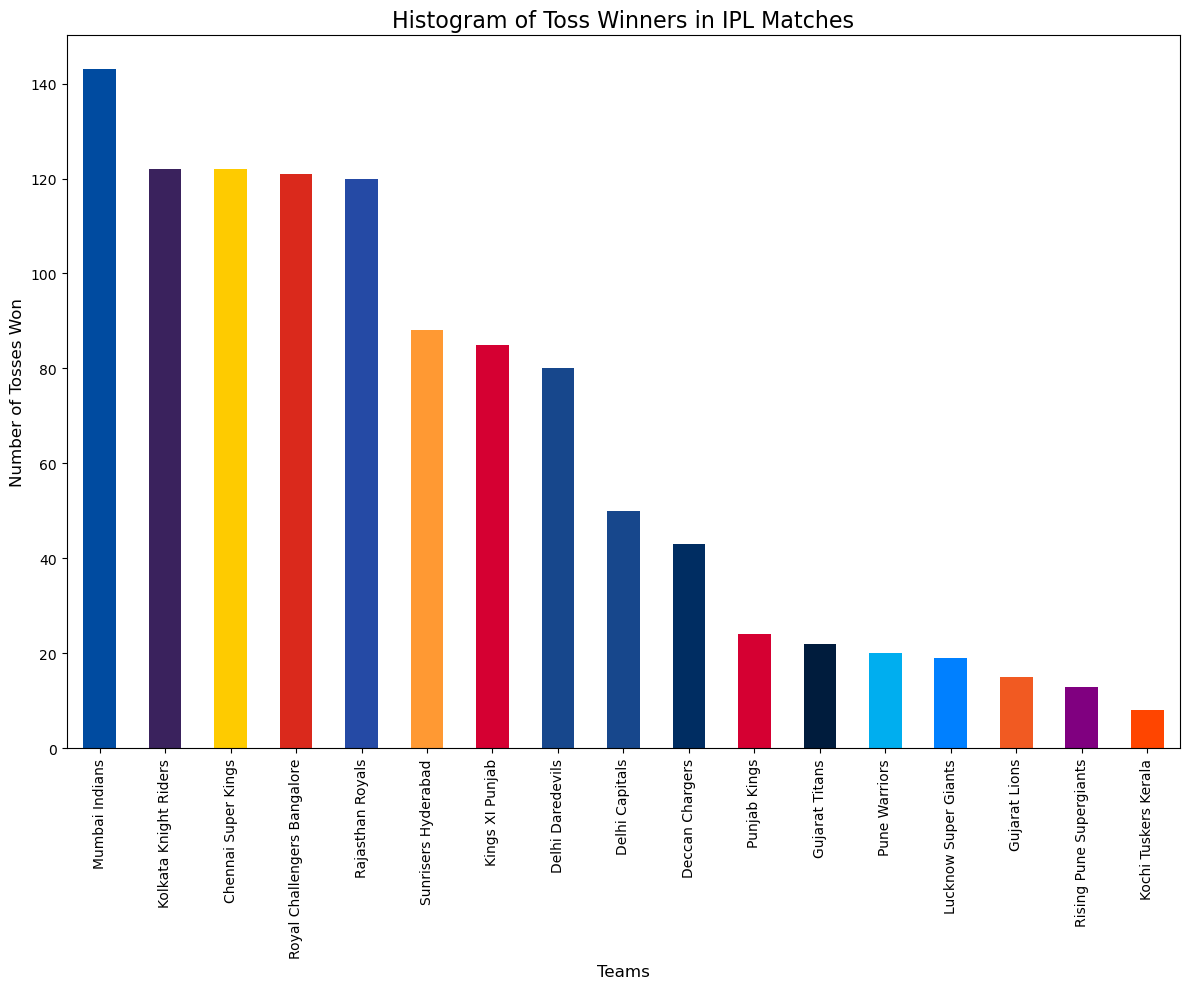

In [122]:
# Team colors based on IPL jerseys
toss_winner_counts = df_matches['toss_winner'].value_counts()
team_colors = {
    'Royal Challengers Bangalore': '#DA291C',  # Red
    'Chennai Super Kings': '#FECB00',  # Yellow
    'Rajasthan Royals': '#254AA5',  # Blue
    'Mumbai Indians': '#004BA0',  # Blue
    'Deccan Chargers': '#002D62',  # Dark Blue
    'Kings XI Punjab': '#D50032',  # Red
    'Kolkata Knight Riders': '#3A225D',  # Purple
    'Delhi Daredevils': '#17478C',  # Blue
    'Kochi Tuskers Kerala': '#FF4500',  # Orange
    'Pune Warriors': '#00AEEF',  # Teal Blue
    'Sunrisers Hyderabad': '#FF9933',  # Orange
    'Gujarat Lions': '#F15A22',  # Orange
    'Rising Pune Supergiants': '#800080',  # Purple
    'Rising Pune Supergiant': '#800080',  # Purple
    'Delhi Capitals': '#17478C',  # Blue
    'Punjab Kings': '#D50032',  # Red
    'Gujarat Titans': '#001C3D',  # Dark Blue
    'Lucknow Super Giants': '#0080FF',  # Light Blue
    'Royal Challengers Bengaluru': '#DA291C'  # Red
}

# Apply the team colors to the bar plot
team_names = toss_winner_counts.index
colors = [team_colors.get(team, 'gray') for team in team_names]

# Plot with assigned colors
plt.figure(figsize=(12, 10))
toss_winner_counts.plot(kind='bar', color=colors)
plt.title('Histogram of Toss Winners in IPL Matches', fontsize=16)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Number of Tosses Won', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [120]:
df_matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Delhi Capitals',
       'Punjab Kings', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [119]:
def change_team_names(df):
    df.loc[df['toss_winner'] == 'Royal Challengers Bengaluru', 'toss_winner'] = 'Royal Challengers Bangalore'
    df.loc[df['team1'] == 'Royal Challengers Bengaluru', 'team1'] = 'Royal Challengers Bangalore'
    df.loc[df['team2'] == 'Royal Challengers Bengaluru', 'team2'] = 'Royal Challengers Bangalore'
    df.loc[df['winner'] == 'Royal Challengers Bengaluru', 'winner'] = 'Royal Challengers Bangalore'
change_team_names(df_matches)

In [110]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1095 non-null   int64 
 1   season           1095 non-null   object
 2   city             1095 non-null   object
 3   date             1095 non-null   object
 4   match_type       1095 non-null   object
 5   player_of_match  1095 non-null   object
 6   team1            1095 non-null   object
 7   team2            1095 non-null   object
 8   toss_winner      1095 non-null   object
 9   toss_decision    1095 non-null   object
 10  winner           1095 non-null   object
 11  result           1095 non-null   object
 12  result_margin    1095 non-null   object
 13  target_runs      1095 non-null   object
 14  target_overs     1095 non-null   object
 15  super_over       1095 non-null   object
 16  method           1095 non-null   object
 17  umpire1          1095 non-null   

In [102]:
df_matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Delhi Capitals',
       'Punjab Kings', 'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [109]:
df_matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Delhi Capitals',
       'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [108]:
df_matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Delhi Capitals',
       'Punjab Kings', 'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [107]:
df_matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'No Winner',
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Delhi Capitals', 'Punjab Kings', 'Gujarat Titans',
       'Lucknow Super Giants', 'Royal Challengers Bengaluru'],
      dtype=object)

In [123]:
df_matches['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

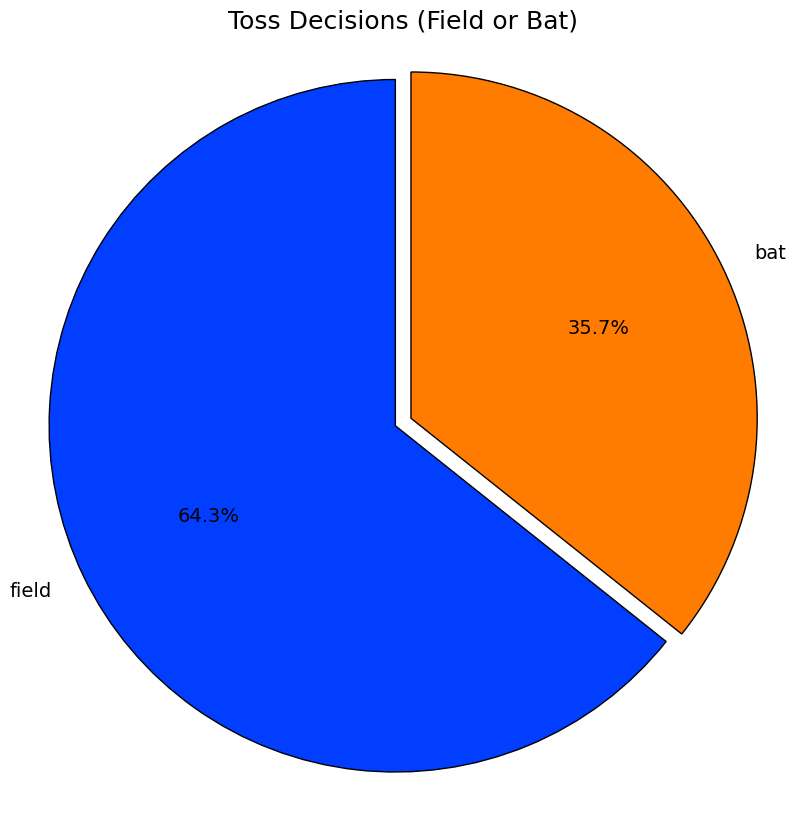

In [133]:
# Count the occurrences of each toss decision
toss_decision_counts = df_matches['toss_decision'].value_counts()

plt.figure(figsize=(10, 10))
vibrant_colors = sns.color_palette("bright")

plt.pie(toss_decision_counts, labels=toss_decision_counts.index, 
        autopct='%1.1f%%', startangle=90, colors=vibrant_colors, 
        explode=[0.05, 0], textprops={'fontsize': 14}, 
        wedgeprops={'edgecolor': 'black'})
plt.title('Toss Decisions (Field or Bat)', fontsize=18)
plt.axis('equal')

plt.show()

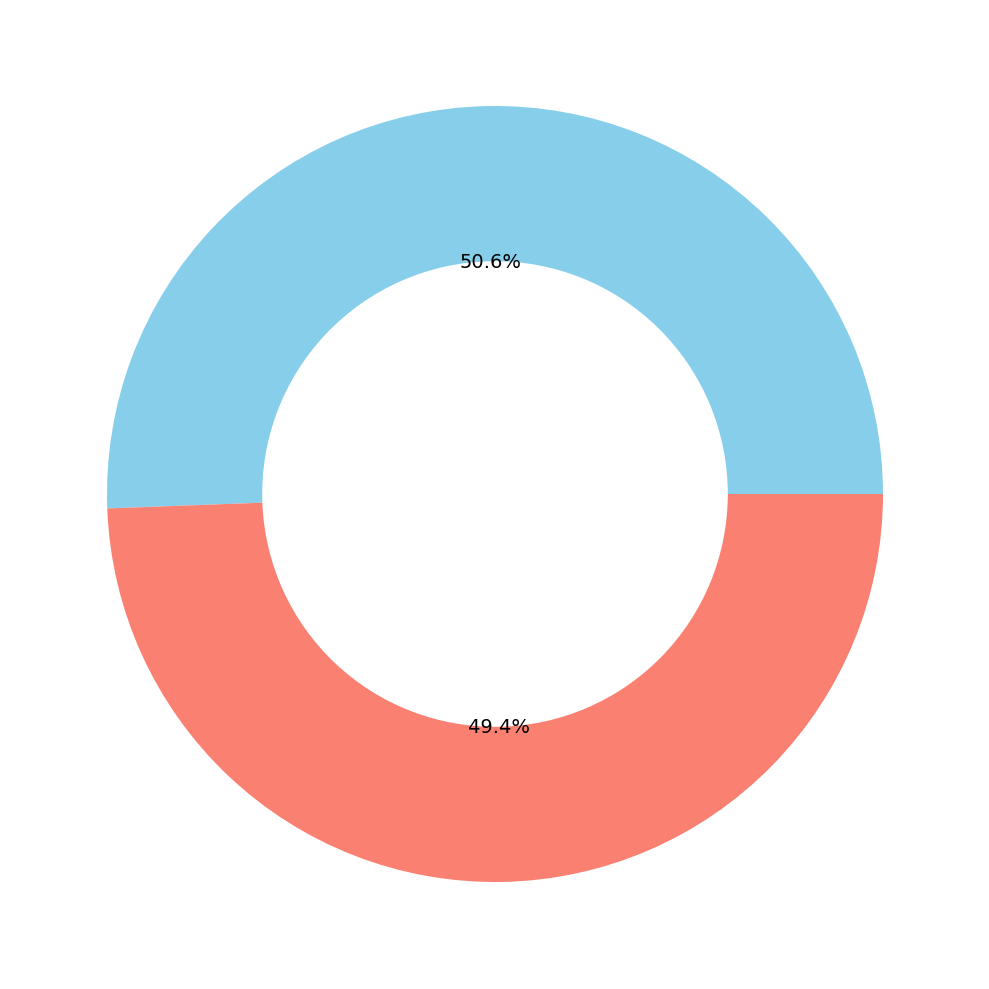

In [150]:
df_matches['toss_win_match_win'] = df_matches['toss_winner'] == df_matches['winner']


toss_win_match_win_counts = df_matches['toss_win_match_win'].value_counts()

plt.figure(figsize=(10, 10))
colors = ['skyblue', 'salmon']
plt.pie(toss_win_match_win_counts, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.4),
        textprops={'fontsize': 14})
plt.tight_layout()
plt.show()